In [1]:
import pickle
import json
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn
import pandas
% matplotlib inline

In [2]:
import twitter

CONSUMER_KEY = 'ecKd3iy3mxp9T8ubn5awrUSt7'
CONSUMER_SECRET = '2ls5YZ4fQuUcJRHVSeHnYcrM5ltZFLTZ3pNrF1N7K6mE16QrS9'
OAUTH_TOKEN = '4813115496-qkbFpJXDLfLt3S6IzmDbhZC8FHSm4r67UFRpysN'
OAUTH_TOKEN_SECRET = 'crmsRqy6SJqLOLNBEOSORv9m3bkcyoAWC1Cl6JG7iqh3n'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

print (twitter_api)


In [43]:

CONSUMER_KEY = 'q4a5V2EoksASbsgpu2swlGRqu'
CONSUMER_SECRET = 'nhOchfYmx9Jg2s1687FlftXCEgPPIYwqtAIpA4je2S2txMzXTu'
OAUTH_TOKEN = '4813982456-VcsK210p106vTvAqMWKiNJ4Ide2iRh5gHsUR9ER'
OAUTH_TOKEN_SECRET = 'DQO8so5VwWOeyASLni9OUQ6IAsH7nH5omXOnKNqWu13Qm'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)


In [3]:
twitter.api??

In [3]:
l=twitter_api.lists.members(slug='NBAteams',owner_screen_name='NBA',skip_status='true',count=30)

In [4]:
name=list()
account_id=list()
followers=list()
friend=list()
location=list()
status=list()
for i in l['users']:
    name.append(i['name'])
    account_id.append(i['id'])
    followers.append(i['followers_count'])
    friend.append(i['friends_count'])
    location.append(i['location'])
    status.append(i['statuses_count'])

with open('objs.pickle','rb') as f:
    tweet_dict= pickle.load(f)
    

In [ ]:
plt.figure(figsize=(30,10))
plt.bar(range(30),followers)
plt.xticks(range(30),name,rotation='vertical')
plt.show()

In [ ]:
plt.figure(figsize=(30,10))
plt.bar(range(30),status)
plt.xticks(range(30),name,rotation='vertical')
plt.show()

In [ ]:
plt.figure(figsize=(30,10))
plt.bar(range(30),friend)
plt.xticks(range(30),name,rotation='vertical')
plt.show()

In [ ]:
tweet_dict=dict()
for j in range(30):
    tweets=list()
    retweets=list()
    hashtags=list()
    photo_or_not=list()
    count=200
    search_results=twitter_api.statuses.user_timeline(count=count,user_id=account_id[j])
    for i in search_results:
        tweets.append(i['text'])
        retweets.append(i['retweet_count'])
        hashtags.append(len(i['entities']['hashtags']))
        if 'media' in i['entities'].keys():
            photo_or_not.append(i['entities']['media'][0]['type'])
        else:
            photo_or_not.append('None')
    mid=search_results[-1]['id']
    print(search_results[0]['created_at'])
    while 'Dec' not in search_results[-1]['created_at']:
        search_results = twitter_api.statuses.user_timeline(count=count,max_id=mid-1,user_id=account_id[j])
        for i in search_results:
            if 'Dec 31' in i['created_at']:
                break
            tweets.append(i['text'])
            retweets.append(i['retweet_count'])
            hashtags.append(len(i['entities']['hashtags']))
            if 'media' in i['entities'].keys():
                photo_or_not.append(i['entities']['media'][0]['type'])
            else:
                photo_or_not.append('None')
        mid=search_results[-1]['id']
    print(search_results[-1]['created_at'])
    tweet_dict[name[j]]=[tweets,retweets,hashtags,photo_or_not]

In [5]:
retweets_total=list()
hashtags_total=list()
photo_total=list()
for i in name:
    retweets_total.extend(tweet_dict[i][1])
    hashtags_total.extend(tweet_dict[i][2])
    photo_total.extend(tweet_dict[i][3])

In [6]:
data0=np.array(retweets_total)[np.where(np.array(photo_total)=='None')]
data1=np.array(retweets_total)[np.where(np.array(photo_total)=='photo')]

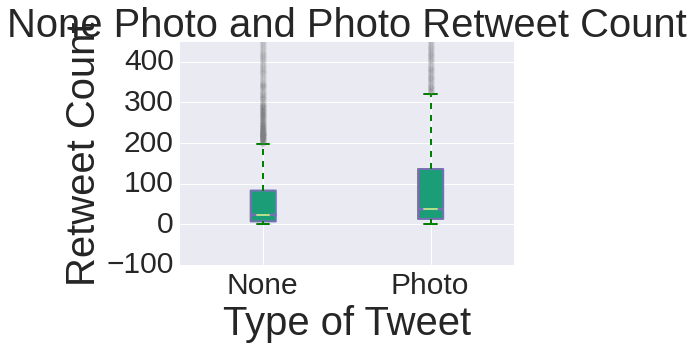

In [7]:
ax=plt.subplot(111)
box=plt.boxplot([data0,data1],notch=True, patch_artist=True)
for b in box['boxes']:
    b.set(color='#7570b3', linewidth=2)
    b.set( facecolor = '#1b9e77' )
for whisker in box['whiskers']:
    whisker.set(color='green', linewidth=2)
for cap in box['caps']:
    cap.set(color='green', linewidth=2)
for median in box['medians']:
    median.set(color='#b2df8a', linewidth=2)
for flier in box['fliers']:
    flier.set(marker='o', color='gray', alpha=0.01)
ax.set_ylim([-100,450])
plt.ylabel('Retweet Count',fontsize=40)
plt.xlabel('Type of Tweet',fontsize=40)
plt.xticks([1,2],['None','Photo'])
plt.title('None Photo and Photo Retweet Count',fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.show()

In [8]:
data0=np.array(retweets_total)[np.where(np.array(hashtags_total)==0)]
data1=np.array(retweets_total)[np.where(np.array(hashtags_total)==1)]
data2=np.array(retweets_total)[np.where(np.array(hashtags_total)==2)]
data3=np.array(retweets_total)[np.where(np.array(hashtags_total)==3)]
data4=np.array(retweets_total)[np.where(np.array(hashtags_total)==4)]
data5=np.array(retweets_total)[np.where(np.array(hashtags_total)==5)]
data6=np.array(retweets_total)[np.where(np.array(hashtags_total)==6)]
data7=np.array(retweets_total)[np.where(np.array(hashtags_total)==7)]

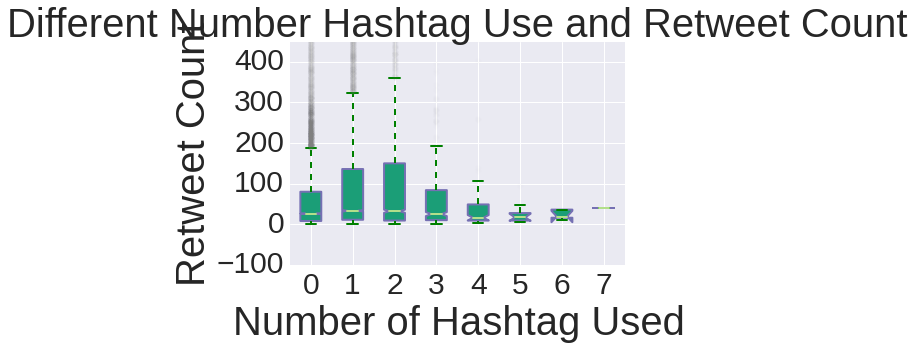

In [9]:
ax=plt.subplot(111)
box=plt.boxplot([data0,data1,data2,data3,data4,data5,data6,data7],notch=True, patch_artist=True)
for b in box['boxes']:
    b.set(color='#7570b3', linewidth=2)
    b.set( facecolor = '#1b9e77' )
for whisker in box['whiskers']:
    whisker.set(color='green', linewidth=2)
for cap in box['caps']:
    cap.set(color='green', linewidth=2)
for median in box['medians']:
    median.set(color='#b2df8a', linewidth=2)
for flier in box['fliers']:
    flier.set(marker='o', color='gray', alpha=0.01)
ax.set_ylim([-100,450])
plt.ylabel('Retweet Count',fontsize=40)
plt.xlabel('Number of Hashtag Used',fontsize=40)
plt.xticks([1,2,3,4,5,6,7,8],[0,1,2,3,4,5,6,7])
plt.title('Different Number Hashtag Use and Retweet Count',fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.show()

In [ ]:
with open('objs.pickle', 'wb') as f:
    pickle.dump(tweet_dict, f)

In [5]:
##

In [5]:
tweet_total=dict()
for i in name:
    tweet_total[i]=list()
for i in range(30):
    for j in range(490):
        tweet_total[name[i]].extend(tweet_dict[name[i]][0][j].lower().split())
    

In [6]:
tweet_total2=dict()
for i in name:
    tweet_total2[i]=list()
for i in range(30):
    for j in tweet_total[name[i]]:
        if re.match('^http',j) == None:
            tweet_total2[name[i]].append(j)

In [7]:
tweet_total3=dict()
for i in name:
    tweet_total3[i]=list()
for i in range(30):
    for j in tweet_total2[name[i]]:
        tweet_total3[name[i]].extend(re.split('\W+',j.lower()))

In [8]:
tweet_total4=dict()
for i in name:
    tweet_total4[i]=list()
for i in range(30):
    for j in tweet_total3[name[i]]:
        if j!='':
            tweet_total4[name[i]].append(j)

In [9]:
total_words=list()
for i in name:
    total_words.extend(tweet_total4[i])

In [10]:
len(set(total_words))

12380

In [11]:
total_words2=list()
for i in total_words:
    if i.isalpha():
        total_words2.append(i)

In [12]:
total_words2=list(set(total_words2))
len(total_words2)

10527

In [13]:
retweets_average=list()
for i in range(30):
    retweets_average.append(np.mean(tweet_dict[name[i]][1][0:490]))

In [14]:
rlist=['in','on','to','at','for','of','from','by','the','a','an','been','be','pau','g','c','f','el','en','ct','rt']

In [15]:
for i in rlist:
    total_words2.remove(i)
len(total_words2)

10506

In [16]:
words_matrix=np.zeros((30,len(total_words2)))
for i in range(30):
    for j in range(len(total_words2)):
        for k in tweet_total[name[i]]:
            if k == total_words2[j]:
                words_matrix[i,j]+=1

In [17]:
m=np.mean(words_matrix,axis=0)
words_matrix2=words_matrix-m
U,S,V=np.linalg.svd(words_matrix2)
S

array([  3.21172221e+02,   2.95117351e+02,   2.38761168e+02,
         1.93686905e+02,   1.76727684e+02,   1.67926053e+02,
         1.61782798e+02,   1.53437866e+02,   1.51385111e+02,
         1.44146374e+02,   1.41276740e+02,   1.35596483e+02,
         1.27720411e+02,   1.25869820e+02,   1.24693229e+02,
         1.21806839e+02,   1.19302016e+02,   1.13696543e+02,
         1.12679994e+02,   1.08786856e+02,   1.04038781e+02,
         1.02480845e+02,   9.76868192e+01,   9.34874080e+01,
         9.09392294e+01,   8.43483338e+01,   7.67744896e+01,
         7.52768029e+01,   7.12119264e+01,   6.13588460e-12])

In [18]:
scores=(words_matrix2).dot(V[1,None].T)

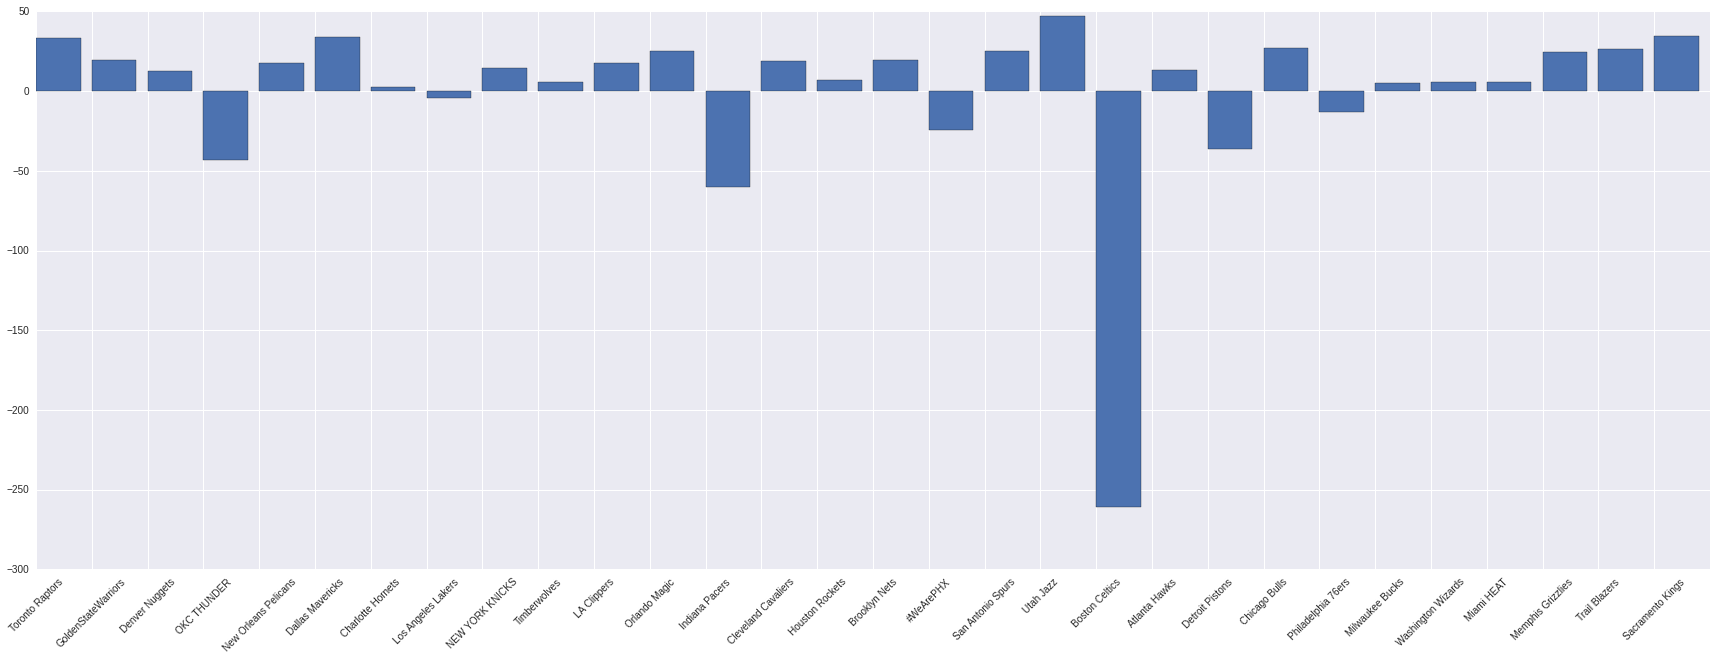

In [19]:
plt.figure(figsize=(30,10))
plt.bar(range(30),scores)
plt.xticks(range(30),name,rotation=45)
plt.show()

In [20]:
import copy

test_retweets=copy.copy(retweets_average)
test_retweets2=copy.copy(retweets_average)
test_scores=copy.copy(scores)
test_names=copy.copy(name)

test_retweets, test_scores = (list(t) for t in zip(*sorted(zip(test_retweets, test_scores))))
test_retweets2,test_names=(list(t) for t in zip(*sorted(zip(test_retweets2, test_names))))

In [21]:
median=np.median(scores)
median

13.998873336031611

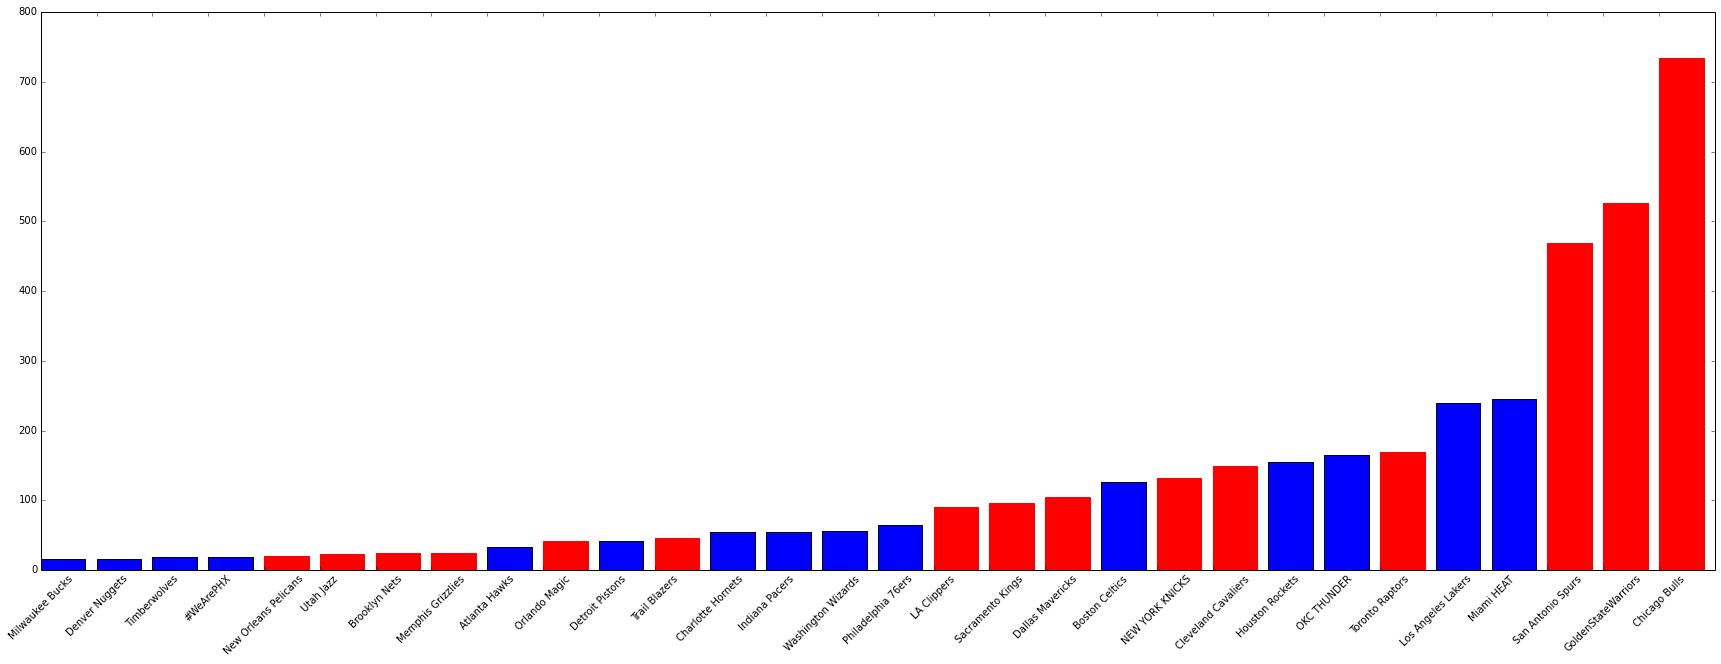

In [22]:
plt.figure(figsize=(30,10))
bar=plt.bar(range(30),test_retweets)
for i in range(30):
    if test_scores[i]>14:
        bar[i].set_color('r')
plt.xticks(range(30),test_names,rotation=45)
plt.show()

In [28]:
%matplotlib 

Using matplotlib backend: TkAgg


In [35]:
low_name

array(['Milwaukee Bucks', 'Denver Nuggets', 'Timberwolves', '#WeArePHX',
       'Atlanta Hawks', 'Detroit Pistons', 'Charlotte Hornets',
       'Indiana Pacers', 'Washington Wizards', 'Philadelphia 76ers',
       'Boston Celtics', 'Houston Rockets', 'OKC THUNDER',
       'Los Angeles Lakers', 'Miami HEAT'], 
      dtype='<U20')

In [36]:
s

array([  15.59591837,   16.24081633,   18.97755102,   18.98979592,
         32.81020408,   41.39387755,   54.25306122,   55.38163265,
         56.47755102,   64.46122449,  127.0122449 ,  155.54897959,
        165.29795918,  239.65714286,  245.77959184])

In [41]:
plt.subplot(1,2,1)
high_name= np.array(test_names)[np.array(factor)=='high']
y_pos = np.arange(len(high_name))
s = np.array(test_retweets2)[np.array(factor)=='high']

plt.barh(y_pos[5:15], s[5:15],align='center',color='red',alpha=0.5)
plt.ylim(ymax=15)
plt.yticks(y_pos[5:15], high_name[5:15],fontsize=35)
plt.xlabel('Average Retweets',fontsize=40)
plt.xticks(fontsize=25)
plt.title('High SVD Scoring Teams',fontsize=55)
plt.show()

ax2=plt.subplot(122)
low_name= np.array(test_names)[np.array(factor)=='low']
y_pos = np.arange(len(low_name))
s = np.array(test_retweets2)[np.array(factor)=='low']

plt.barh(y_pos[5:15], s[5:15],align='center', color='#619CFF',alpha=0.5)
ax2.set_xlim([0,800])
plt.ylim(ymax=15)
plt.yticks(y_pos[5:15], low_name[5:15],fontsize=35)
plt.xticks(fontsize=25)
plt.xlabel('Average Retweets',fontsize=40)
plt.title('Low SVD Scoring Teams',fontsize=55)

plt.show()

In [23]:
factor=list()
for i in range(30):
    if test_scores[i]>14:
        factor.append('high')
    else:
        factor.append('low')

In [23]:
v1=V[1,:]

vmax=copy.copy(v1)
vmin=copy.copy(v1)

ind_max=vmax.argsort()[-100:][::-1]

print(np.array(total_words2)[ind_max])

ind_min=vmin.argsort()[:100]

print(np.array(total_words2)[ind_min])

['jazz' 'mavs' 'raps' 'kings' 'your' 'hayward' 'kawhi' 'jimmy' 'happy'
 'dirk' 'dubs' 'spurs' 'butler' 'gobert' 'leonard' 'win' 'boogie' 'gasol'
 'rudy' 'squad' 'hood' 'rockets' 'see' 'injury' 'parsons' 'demar' 'tweet'
 'come' 'here' 'highlights' 'blazers' 'rondo' 'dunk' 'action' 'gordon'
 'fans' 'these' 'bucks' 'brook' 'coach' 'neto' 'looking' 'love' 'there'
 'star' 'clippers' 'history' 'gameday' 'great' 'no' 'double' 'hornets'
 'matchup' 'portland' 'zaza' 'cousins' 'franchise' 'only' 'via' 'lopez'
 'under' 'harden' 'green' 'hawks' 'jv' 'basketball' 'fun' 'inside' 'sf'
 'derrick' 'threes' 'chance' 'big' 'pf' 'harris' 'shot' 'afflalo'
 'congrats' 'tony' 'almost' 'stls' 'lakers' 'remaining' 'claim' 'favorite'
 'shoot' 'oh' 'mt' 'video' 'la' 'arena' 'photos' 'blks' 'stat' 'lillard'
 'everyone' 'lyles' 'heat' 'manu' 'look']
['and' 'stevens' 'celtics' 'brad' 'thomas' 'isaiah' 'he' 'his' 'it' 'has'
 'says' 'crowder' 'but' 'is' 'thunder' 'bradley' 'jae' 'points' 'that'
 'with' 'marcus' 'aver

In [24]:
difference=np.abs(words_matrix2[21,:]-words_matrix2[22,:])

In [272]:
ind=difference.argsort()[-500:][::-1]

In [273]:
chicago_more_detroit_less=list()
detroit_more_chicago_less=list()
for i in ind:
    if words_matrix2[22,i]>0 and v1[i]>0 and words_matrix2[21,i]<0:
        chicago_more_detroit_less.append(i)
    if words_matrix2[22,i]<0 and v1[i]<0 and words_matrix2[21,i]>0:
        detroit_more_chicago_less.append(i)

In [274]:
np.array(total_words2)[chicago_more_detroit_less]

array(['jimmy', 'butler', 'gasol', 'derrick', 'rose', 'here', 'this',
       'para', 'joakim', 'fans', 'noah', 'taj', 'si', 'tweet', 'doing',
       'ver', 'doug', 'best', 'voto', 'huge', 'despite', 'que', 'star',
       'queréis', 'la', 'most', 'y', 'buckets', 'staying', 'pre', 'card',
       'q', 'bobby', 'vamos', 'tie', 'mi', 'gm', 'gift', 'mcdermott',
       'autographed', 'kirk', 'solid', 'read', 'warriors', 'mcbuckets',
       'field', 'oh', 'story', 'johnny', 'early', 'usando', 'cristiano',
       'niko', 'face', 'dougie', 'afternoon', 'surgery', 'latest', 'hawks',
       'welcome', 'action', 'busting', 'nikola', 'vez', 'snowed', 'nights',
       'yo', 'también', 'sequel', 'votadle', 'maybe', 'dig', 'resort',
       'almost', 'este', 'canton', 'mirotic', 'winning', 'tony', 'fgs',
       'passing', 'apoyo', 'milwaukee', 'un', 'dominant', 'hamstring',
       'mark', 'question', 'find', 'rolling', 'current', 'reflects',
       'brooks', 'gibson', 'continue', 'wpwr', 'becomes', 'cad

In [66]:
np.array(total_words2)[detroit_more_chicago_less]

array(['with', 'and', 'our', 'reggie', 'kcp', 'presented', 'we', 'play',
       'dre', 'pistons', 'game', 'ersan', 'down', 'check', 'his',
       'stanley', 'point', 'two', 'three', 'brandon', 'some', 'starting',
       'more', 'marcus', 'svg', 'about', 'can', 'first', 'breakdown',
       'then', 'new', 'another', 'raptors', 'playback', 'plus', 'enter',
       'andre', 'tonight', 'healthy', 'points', 'us', 'lead', 'denver',
       'as', 'up', 'but', 'february', 'tickets', 'pic', 'share', 'next',
       'baynes', 'stop', 'had', 'second', 'special', 'making', 'taking',
       'app', 'tom', 'night', 'brooklyn', 'flint', 'also', 'performance',
       'toronto', 'nets', 'block', 'tolliver', 'it', 'he', 'stan', 'gundy',
       'van', 'one', 'trivia', 'retire', 'before', 'thursday', 'happening',
       'section', 'rebounds', 'relief', 'review', 'drive', 'when', 'could',
       'jam', 'knicks', 'johnson', 'wednesday', 'until', 'exercising',
       'fourth', 'gores', 'recipes', 'plays', 'people